# Welcome to Jupyter!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

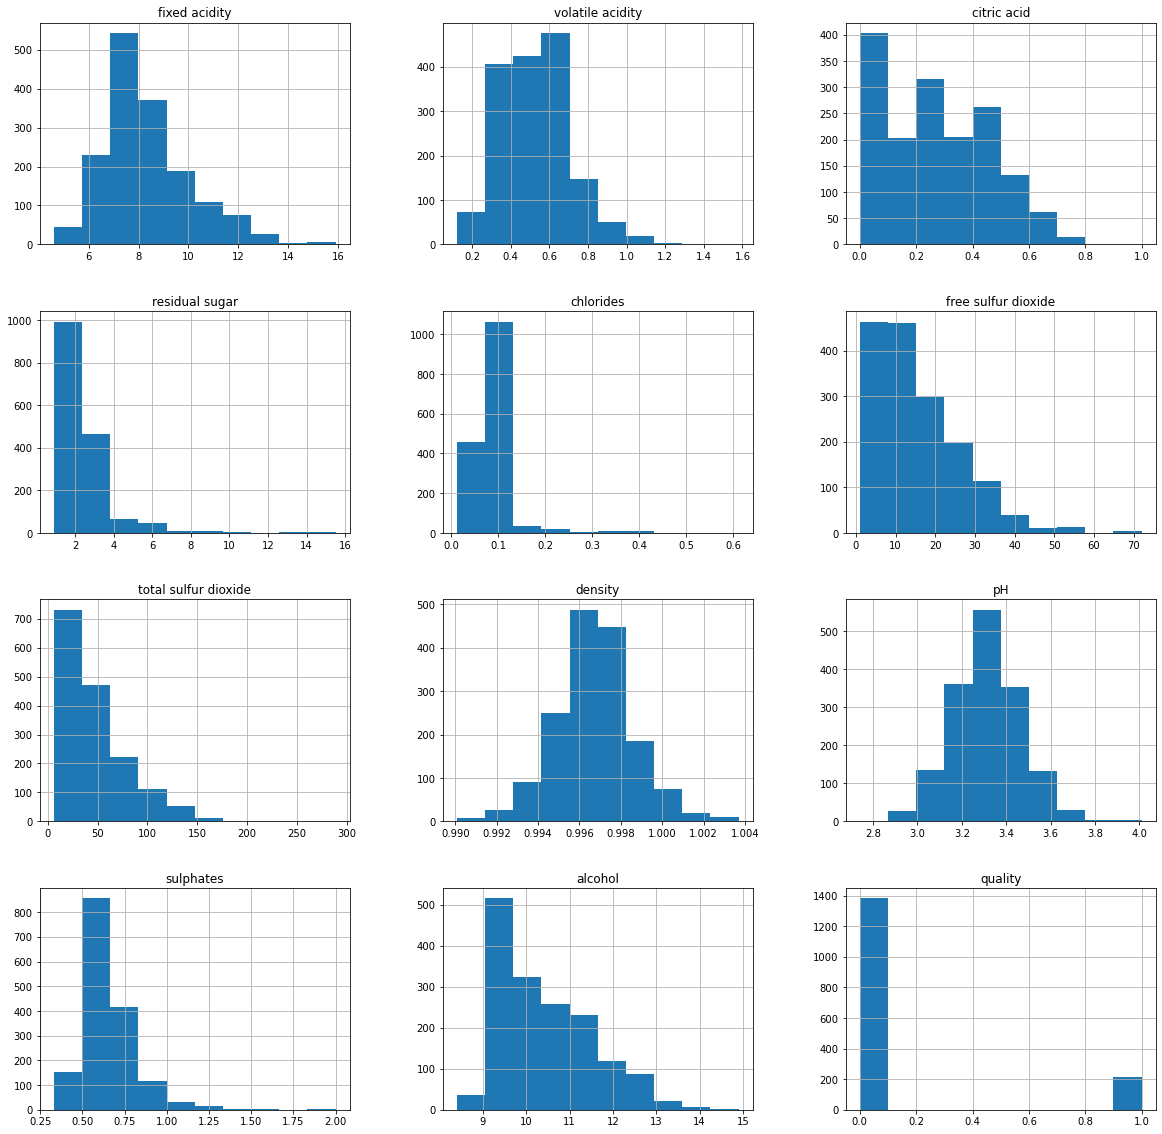

In [69]:
c=df.hist(figsize=(20,20))

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

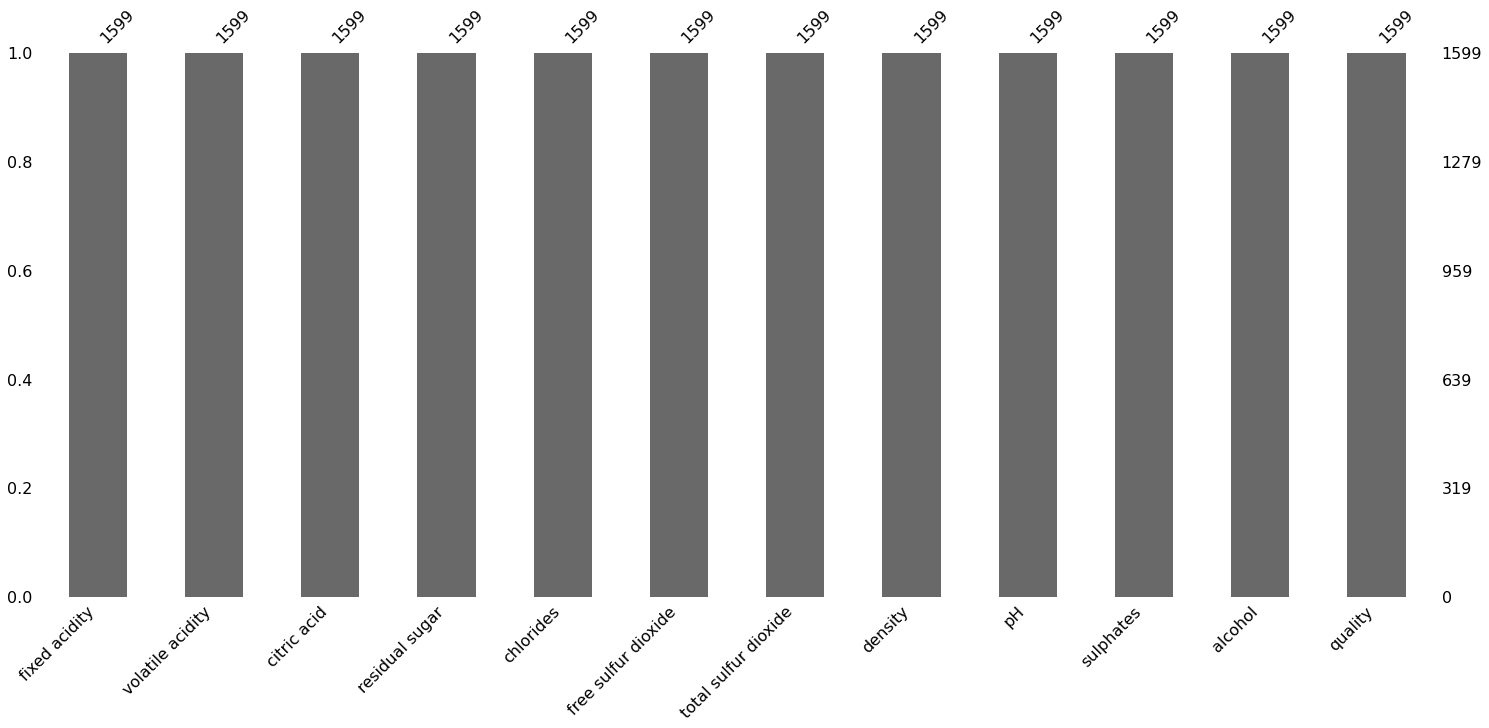

In [66]:
import missingno as msno
p=msno.bar(df)

In [9]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [10]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

0    1382
1     217
Name: quality, dtype: int64


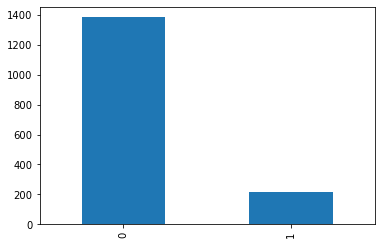

In [67]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df["quality"].map(lambda x: color_wheel.get(x+1))
print(df.quality.value_counts())
c=df.quality.value_counts().plot(kind="bar")

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['quality'] = labelencoder_y.fit_transform(df['quality'])

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


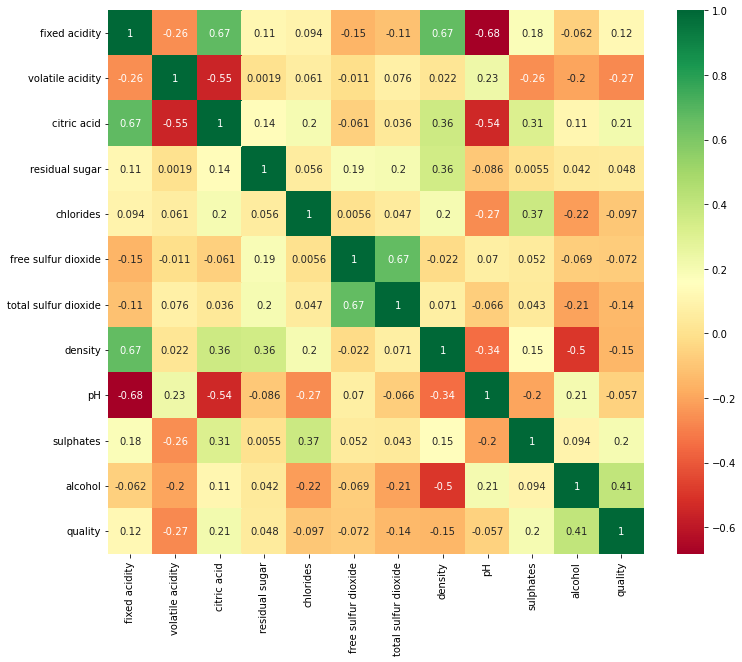

In [15]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

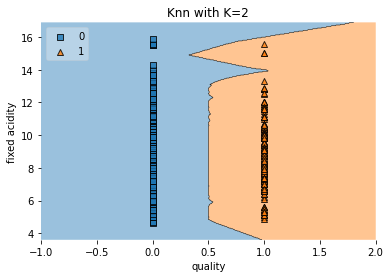

In [47]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'fixed acidity' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])
    

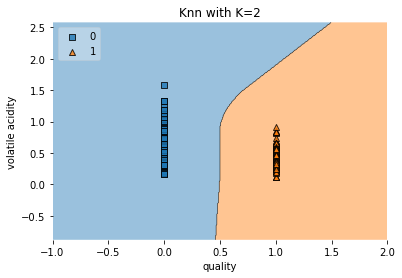

In [23]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'volatile acidity' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

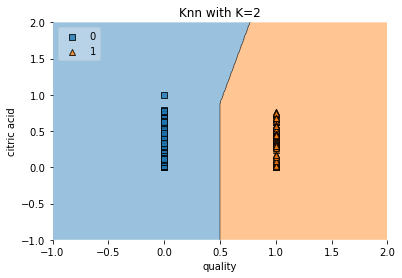

In [24]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'citric acid' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

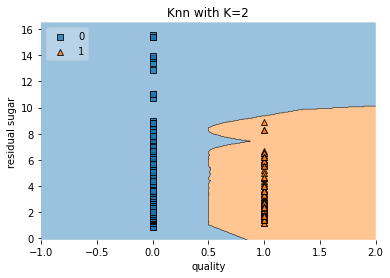

In [25]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'residual sugar' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

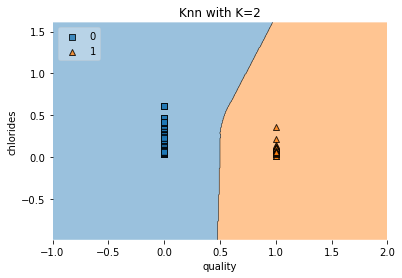

In [26]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'chlorides' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

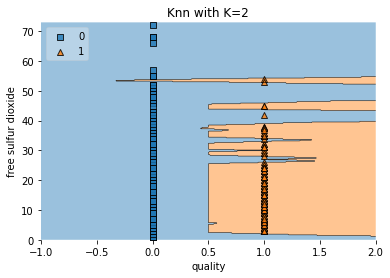

In [27]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'free sulfur dioxide' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

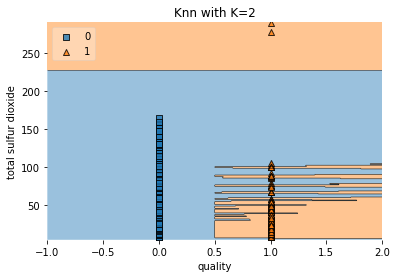

In [28]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'total sulfur dioxide' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

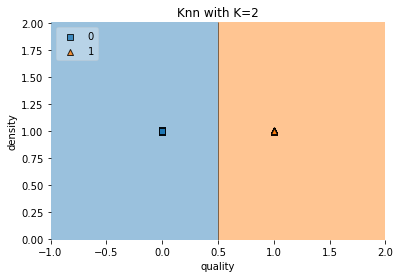

In [29]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'density' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

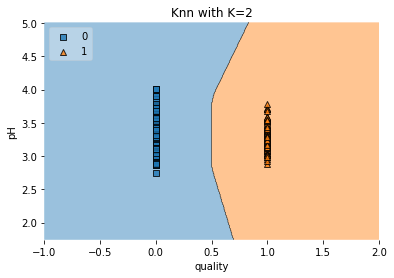

In [30]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'pH' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

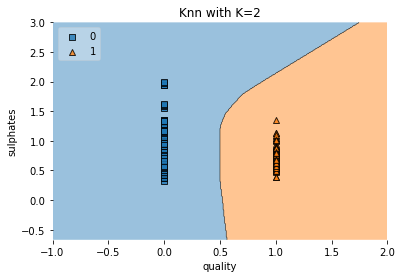

In [31]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'sulphates' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

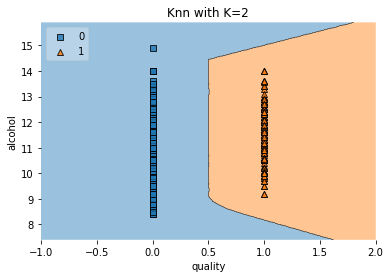

In [32]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def ok(X,Y):
  x = df[[X,Y]].values
  y = df['quality'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(2))
  plt.show()

tt = ['quality', 'alcohol' ]
ll = len(tt)

for i in range(0,2):
  for j in range(i+1,2):
    ok(tt[i],tt[j])

In [53]:
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [61]:
from sklearn.metrics import accuracy_score
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.9022699311023622
Training set:  1.0
Test set:  0.89375


In [62]:
confusion_matrix(y_test, y_pred_knn_test)

array([[264,   9],
       [ 25,  22]])